In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, mutual_info_classif,r_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the datasets for training and testing
train_data = pd.read_csv("../data/BinaryClassify/train_nsl_kdd_binary_encoded.csv")
test_data = pd.read_csv("../data/BinaryClassify/test_nsl_kdd_binary_encoded.csv")

In [3]:
# # Reduce sample size for testing
# train_data = train_data.sample(frac=0.1, random_state=42)

In [4]:
# Features and labels for training
X_train = train_data.drop("binaryoutcome", axis=1)
y_train = train_data["binaryoutcome"]

In [5]:
# Features and labels for testing
X_test = test_data.drop("binaryoutcome", axis=1)
y_test = test_data["binaryoutcome"]

In [11]:
# Define a function to apply a filter method, evaluate accuracy, and store results
def evaluate_filter(filter_method, name, X_train, y_train, X_test, y_test):
    filter_model = filter_method
    accuracy_scores = []
    num_features = []

    # Fit the filter model
    filter_model.fit(X_train, y_train)

    # Sort features or use as is based on the method
    if hasattr(filter_model, 'scores_'):
        feature_info = list(zip(X_train.columns, filter_model.scores_))
        feature_sorted = X_train.columns[np.argsort(filter_model.scores_)[::-1]]
    elif hasattr(filter_model, 'get_support'):
        retained_features = X_train.columns[filter_model.get_support()]
        feature_info = list(zip(X_train.columns, filter_model.get_support()))
        feature_sorted = retained_features

    # Custom sorting function that handles NaN values
    def custom_sort(item):
        return float('-inf') if np.isnan(item[1]) else item[1]

    sorted_feature_info = sorted(feature_info, key=custom_sort, reverse=True)

    print(f"Feature Information: {sorted_feature_info}")
    print(f"Feature Sorted: {feature_sorted}")

    for i in range(1, X_train.shape[1] + 1):
        # Extract top i features based on your sorted feature list
        x_train_filtered = X_train[feature_sorted[:i]]
        x_test_filtered = X_test[feature_sorted[:i]]

        # Ensure at least one feature is selected
        if x_train_filtered.shape[1] > 0:
            # Train the model on the filtered training data
            clf = RandomForestClassifier()
            clf.fit(x_train_filtered, y_train)

            # Test the model on the filtered test data
            accuracy = clf.score(x_test_filtered, y_test)
            accuracy_scores.append(accuracy)
            num_features.append(i)

            print(
                f"Iteration {i}: {name} - Num Features: {i}, Test Accuracy: {accuracy:.4f}")

    plt.plot(num_features, accuracy_scores, label=name)


### Apply Filters

/Users/aravind/Projects/IntrusionDetection/IntrusionDetection/venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/aravind/Projects/IntrusionDetection/IntrusionDetection/venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Feature Information: [('same_srv_rate', 163863.93340376898), ('dst_host_srv_count', 137605.5500466565), ('dst_host_same_srv_rate', 116922.76800447589), ('logged_in', 114591.30239691118), ('dst_host_srv_serror_rate', 94644.56896491503), ('dst_host_serror_rate', 93068.50398806193), ('serror_rate', 92480.069219908), ('srv_serror_rate', 91323.27304188497), ('flag', 90734.32914678488), ('count', 62688.48186756385), ('level', 21221.68175520428), ('dst_host_count', 20619.81623154969), ('protocol_type', 10829.24629114564), ('service', 10431.585195731685), ('srv_rerror_rate', 8651.212571678821), ('dst_host_srv_rerror_rate', 8645.828698530271), ('rerror_rate', 8643.420842149846), ('dst_host_rerror_rate', 8582.793908410691), ('dst_host_diff_srv_rate', 7898.062300562178), ('diff_srv_rate', 5450.899043857213), ('srv_diff_host_rate', 1821.240952660609), ('wrong_fragment', 1169.402573816652), ('dst_host_same_src_port_rate', 1085.8354358278714), ('dst_host_srv_diff_host_rate', 491.312679973909), ('dur

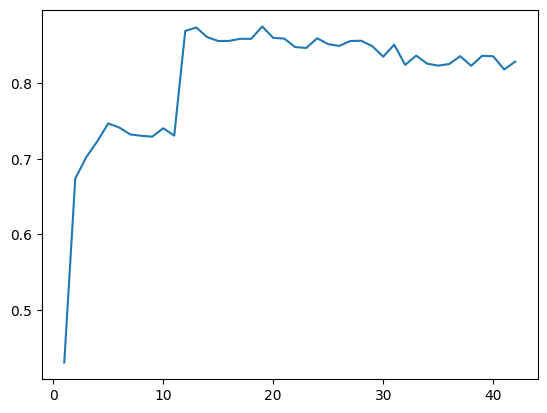

In [7]:
select_k_best_pearson = SelectKBest(f_classif, k=X_train.shape[1])
evaluate_filter(select_k_best_pearson, "PEARSON", X_train, y_train, X_test, y_test)

Feature Information: [('src_bytes', 3340257591.4457445), ('dst_bytes', 1746063122.1702244), ('duration', 7082565.303892097), ('dst_host_srv_count', 6968826.69801921), ('count', 6525616.721263824), ('dst_host_count', 957425.8043037683), ('service', 82437.93955815387), ('flag', 54653.93292607195), ('dst_host_srv_serror_rate', 38543.822243196024), ('srv_serror_rate', 37451.32465887905), ('serror_rate', 37364.83553764291), ('dst_host_serror_rate', 37225.466492949854), ('logged_in', 36259.73858447517), ('num_root', 32550.97103273541), ('num_compromised', 26894.75327950227), ('dst_host_same_srv_rate', 23448.2085387342), ('same_srv_rate', 20826.414096268774), ('srv_rerror_rate', 6997.367717676969), ('rerror_rate', 6923.373013273987), ('dst_host_srv_rerror_rate', 6866.941117392023), ('dst_host_rerror_rate', 6354.755807978947), ('level', 4889.745829142064), ('wrong_fragment', 3282.6784240150096), ('dst_host_diff_srv_rate', 3197.8426151034937), ('diff_srv_rate', 2694.210071542976), ('protocol_ty

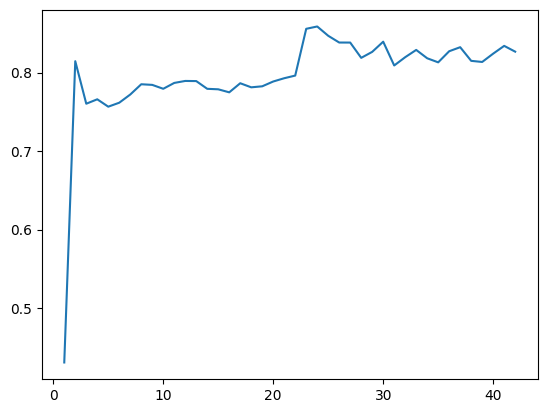

In [8]:
select_k_best_chi2 = SelectKBest(chi2, k=X_train.shape[1])
evaluate_filter(select_k_best_chi2, "Chi-Squared", X_train, y_train, X_test, y_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


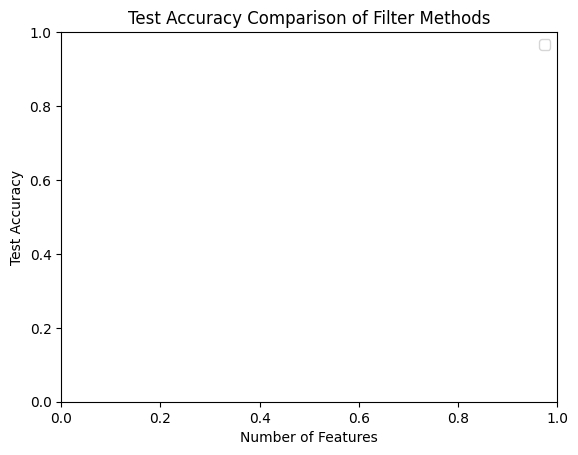

In [9]:
select_k_best_mutual_info = SelectKBest(mutual_info_classif, k=X_train.shape[1])
evaluate_filter(select_k_best_mutual_info, "Mutual Information", X_train, y_train, X_test, y_test)

In [21]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.metrics import mutual_info_score
from scipy.stats import entropy

class SymmetricUncertainty(BaseEstimator):
    def __init__(self):
        self.scores_ = None

    def fit(self, X_train, y_train):
        if len(X_train) != len(y_train):
            raise ValueError("Input arrays must have the same length.")

        num_features = X_train.shape[1]
        self.scores_ = np.zeros(num_features)

        # Use vectorized operations
        label_counts = np.bincount(y_train.astype(int))
        label_probs = label_counts / len(y_train)
        entropy_target = entropy(label_probs, base=2)

        # Parallelize the loop for calculating SU scores
        def calculate_su(feature_idx):
            feature_values = X_train[:, feature_idx]
            mutual_info = mutual_info_score(feature_values, y_train)
            entropy_feature = entropy(np.bincount(feature_values.astype(int)) / len(feature_values), base=2)
            return 2 * mutual_info / (entropy_feature + entropy_target)

        from joblib import Parallel, delayed
        self.scores_ = Parallel(n_jobs=-1)(delayed(calculate_su)(i) for i in range(num_features))

        return self


In [22]:
su = SymmetricUncertainty()

In [25]:
select_k_best_su = SelectKBest(su, k=X_train.shape[1])
evaluate_filter(select_k_best_su, "S U", X_train, y_train, X_test, y_test)

InvalidParameterError: The 'score_func' parameter of SelectKBest must be a callable. Got SymmetricUncertainty() instead.